# Задание 1. Загрузка и первичный анализ

- Загрузите данные из CSV в DataFrame.
- Проверьте типы колонок и количество непустых значений (info()).
- Преобразуйте order_start_prepare и order_ready в datetime.
- Подсчитайте число пропусков по каждому столбцу и сделайте первичные выводы.

## Загрузите данные из CSV в DataFrame

In [200]:
import pandas as pd


def load_df_by_name(name: str) -> pd.DataFrame:
    """
    Загрузить набор данных файла по имени.
    """
    return pd.read_csv(f"./data/{name}.csv")


orders = load_df_by_name("orders")
products = load_df_by_name("products")
regions = load_df_by_name("regions")
stores = load_df_by_name("stores")


## Проверьте типы колонок и количество непустых значений (info()).

In [201]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19871 entries, 0 to 19870
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           19871 non-null  int64  
 1   store_id             19871 non-null  int64  
 2   order_id             19871 non-null  int64  
 3   product_id           322 non-null    float64
 4   price                17944 non-null  float64
 5   profit               17771 non-null  float64
 6   delivery_distance    19871 non-null  int64  
 7   order_start_prepare  17908 non-null  object 
 8   planned_prep_time    19871 non-null  float64
 9   order_ready          17771 non-null  object 
 10  region_id            19871 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 1.7+ MB


In [202]:
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    71 non-null     int64 
 1   name_product  71 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [203]:
regions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   region_id             8 non-null      int64 
 1   delivery_region_name  8 non-null      object
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes


In [204]:
stores.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_id    62 non-null     int64 
 1   store_name  62 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


## Преобразуйте order_start_prepare и order_ready в datetime.

In [205]:
updated_orders = orders.copy()
updated_orders["order_start_prepare"] = pd.to_datetime(
    updated_orders["order_start_prepare"]
)
updated_orders["order_ready"] = pd.to_datetime(updated_orders["order_ready"])

updated_orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19871 entries, 0 to 19870
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           19871 non-null  int64         
 1   store_id             19871 non-null  int64         
 2   order_id             19871 non-null  int64         
 3   product_id           322 non-null    float64       
 4   price                17944 non-null  float64       
 5   profit               17771 non-null  float64       
 6   delivery_distance    19871 non-null  int64         
 7   order_start_prepare  17908 non-null  datetime64[ns]
 8   planned_prep_time    19871 non-null  float64       
 9   order_ready          17771 non-null  datetime64[ns]
 10  region_id            19871 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(5)
memory usage: 1.7 MB


## Подсчитайте число пропусков по каждому столбцу и сделайте первичные выводы.

In [206]:
def print_nans(df: pd.DataFrame) -> None:
    COLUMN_IDX: int = 1
    count = 0
    has_nans = 0

    for column_name in df:
        count += 1
        column = df[column_name]
        column_type = column.dtype
        nans_count = column.isna().sum()
        if nans_count > 0:
            print(
                f'{count}) "{column_name}" содержит {nans_count} пустых значений, тип "{column_type}".'
            )
            has_nans += 1
        else:
            print(
                f'{count}) "{column_name}" не содержит пустых значений, тип "{column_type}".'
            )

    print(f"\nИтого: [{has_nans}/{df.shape[COLUMN_IDX]}] столбцов с NaN значениями.")


In [207]:
print_nans(updated_orders)


1) "Unnamed: 0" не содержит пустых значений, тип "int64".
2) "store_id" не содержит пустых значений, тип "int64".
3) "order_id" не содержит пустых значений, тип "int64".
4) "product_id" содержит 19549 пустых значений, тип "float64".
5) "price" содержит 1927 пустых значений, тип "float64".
6) "profit" содержит 2100 пустых значений, тип "float64".
7) "delivery_distance" не содержит пустых значений, тип "int64".
8) "order_start_prepare" содержит 1963 пустых значений, тип "datetime64[ns]".
9) "planned_prep_time" не содержит пустых значений, тип "float64".
10) "order_ready" содержит 2100 пустых значений, тип "datetime64[ns]".
11) "region_id" не содержит пустых значений, тип "int64".

Итого: [5/11] столбцов с NaN значениями.


# Задание 2. Визуализация

- Постройте гистограмму по product_id с подписями product_name.
- Постройте график плотности для price.
- Анализ «одной переменной»: describe() + гистограммы (для store_id/region_id — подписи store_name/region_name), графики плотности для числовых признаков.

## Постройте гистограмму по product_id с подписями product_name.

In [208]:
import matplotlib.pyplot as plt


def make_histogram(df: pd.DataFrame, ylabel: str, xlabel: str) -> None:
    ylabels = df[ylabel]
    xlabels = df[xlabel]

    plt.figure(figsize=(12, 4))
    plt.bar(ylabels.astype(str), [1] * len(df))

    plt.xticks(
        ticks=range(len(df)),
        labels=xlabels,
        rotation=90,
    )
    plt.xlabel("Название")
    plt.ylabel("Частота")
    plt.title("Гистограмма")

    plt.show()


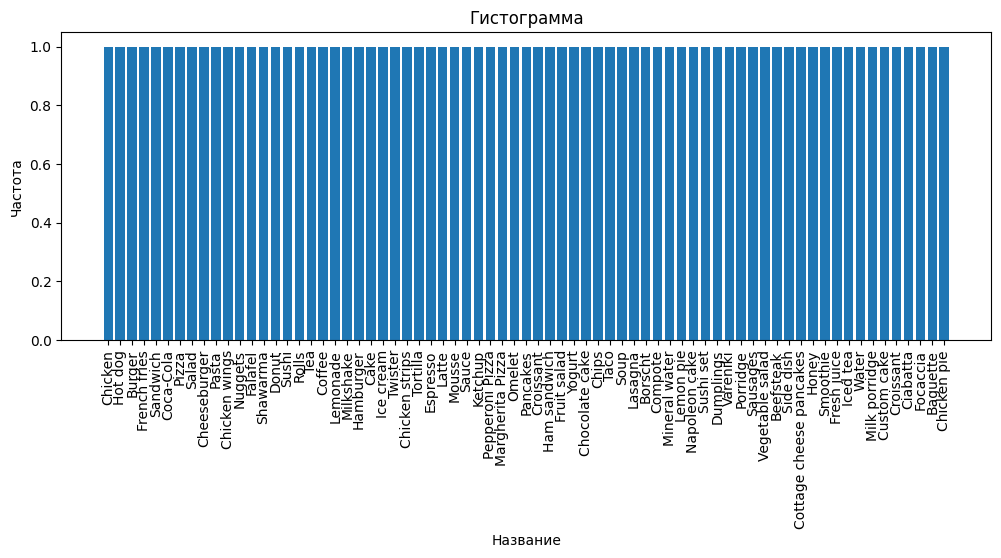

In [209]:
make_histogram(products, "product_id", "name_product")

## Постройте график плотности для price.

<Axes: ylabel='Density'>

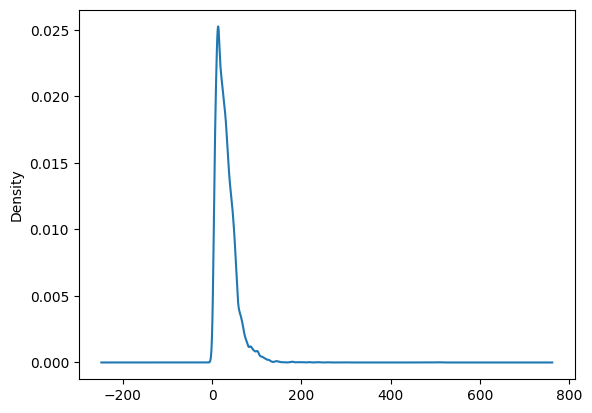

In [210]:
prices = updated_orders["price"]
prices.plot.density()


## Анализ «одной переменной»: describe() + гистограммы (для store_id/region_id — подписи store_name/region_name), графики плотности для числовых признаков.

In [211]:
store_ids = updated_orders["store_id"]
store_ids.describe()


count    19871.000000
mean      6125.005938
std       2753.504051
min       3053.000000
25%       3686.000000
50%       5014.000000
75%       8717.000000
max      11819.000000
Name: store_id, dtype: float64

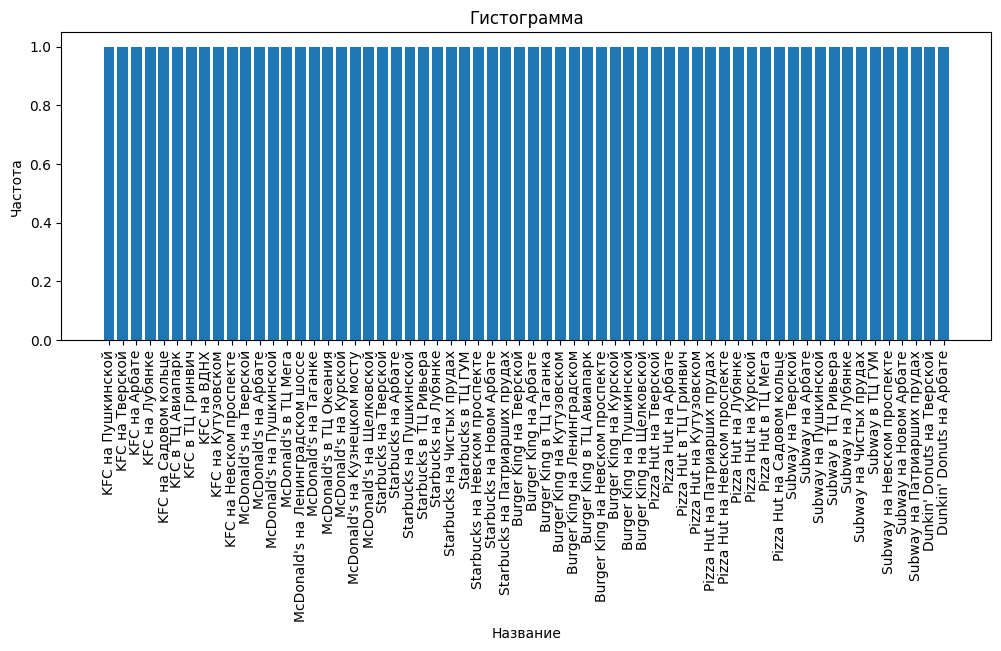

In [212]:
make_histogram(stores, "store_id", "store_name")


<Axes: ylabel='Density'>

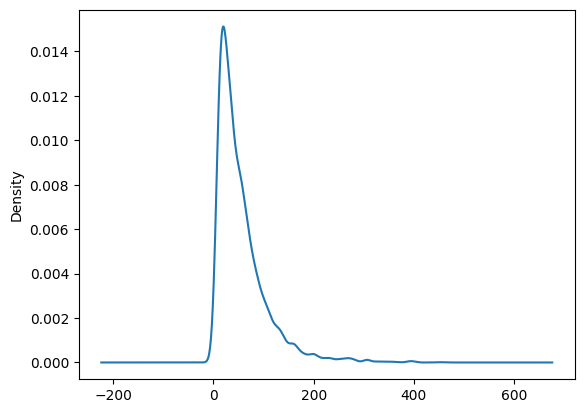

In [213]:
profits = updated_orders["profit"]
profits.plot.density()


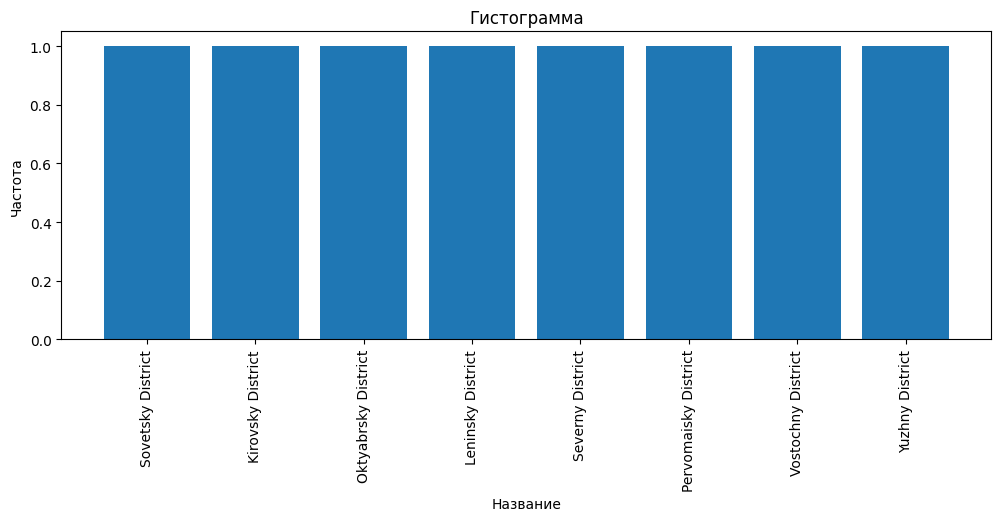

In [214]:
make_histogram(regions, "region_id", "delivery_region_name")


# Задание 3. Анализ аномалий

- Проверьте данные на выбросы и NaN.
- Обоснуйте и примените стратегии обработки пропусков (для разных признаков стратегии могут отличаться).
- Обоснуйте и примените стратегию обработки выбросов.

## Проверьте данные на выбросы и NaN

In [215]:
updated_orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19871 entries, 0 to 19870
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           19871 non-null  int64         
 1   store_id             19871 non-null  int64         
 2   order_id             19871 non-null  int64         
 3   product_id           322 non-null    float64       
 4   price                17944 non-null  float64       
 5   profit               17771 non-null  float64       
 6   delivery_distance    19871 non-null  int64         
 7   order_start_prepare  17908 non-null  datetime64[ns]
 8   planned_prep_time    19871 non-null  float64       
 9   order_ready          17771 non-null  datetime64[ns]
 10  region_id            19871 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(5)
memory usage: 1.7 MB


In [216]:
print_nans(updated_orders)


1) "Unnamed: 0" не содержит пустых значений, тип "int64".
2) "store_id" не содержит пустых значений, тип "int64".
3) "order_id" не содержит пустых значений, тип "int64".
4) "product_id" содержит 19549 пустых значений, тип "float64".
5) "price" содержит 1927 пустых значений, тип "float64".
6) "profit" содержит 2100 пустых значений, тип "float64".
7) "delivery_distance" не содержит пустых значений, тип "int64".
8) "order_start_prepare" содержит 1963 пустых значений, тип "datetime64[ns]".
9) "planned_prep_time" не содержит пустых значений, тип "float64".
10) "order_ready" содержит 2100 пустых значений, тип "datetime64[ns]".
11) "region_id" не содержит пустых значений, тип "int64".

Итого: [5/11] столбцов с NaN значениями.


In [217]:
print_nans(products)


1) "product_id" не содержит пустых значений, тип "int64".
2) "name_product" не содержит пустых значений, тип "object".

Итого: [0/2] столбцов с NaN значениями.


In [218]:
print_nans(regions)


1) "region_id" не содержит пустых значений, тип "int64".
2) "delivery_region_name" не содержит пустых значений, тип "object".

Итого: [0/2] столбцов с NaN значениями.


In [219]:
print_nans(stores)


1) "store_id" не содержит пустых значений, тип "int64".
2) "store_name" не содержит пустых значений, тип "object".

Итого: [0/2] столбцов с NaN значениями.


In [220]:
import datetime

fixed_orders = updated_orders.copy()

# Удаляем строки без цены или прибыли
fixed_orders = (
    fixed_orders.dropna(subset=["price", "profit"]).copy().reset_index(drop=True)
)

# Пропущенные product_id заполняем фиктивным значением
fixed_orders["product_id"] = fixed_orders["product_id"].fillna(-1).astype(int)

# Пропущенные даты заполняем служебным значением
default_date = datetime.datetime(1970, 1, 1)
fixed_orders["order_start_prepare"] = fixed_orders["order_start_prepare"].fillna(
    default_date
)
fixed_orders["order_ready"] = fixed_orders["order_ready"].fillna(default_date)

fixed_orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16051 entries, 0 to 16050
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           16051 non-null  int64         
 1   store_id             16051 non-null  int64         
 2   order_id             16051 non-null  int64         
 3   product_id           16051 non-null  int64         
 4   price                16051 non-null  float64       
 5   profit               16051 non-null  float64       
 6   delivery_distance    16051 non-null  int64         
 7   order_start_prepare  16051 non-null  datetime64[ns]
 8   planned_prep_time    16051 non-null  float64       
 9   order_ready          16051 non-null  datetime64[ns]
 10  region_id            16051 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(6)
memory usage: 1.3 MB
